In [1]:
# Install and load required packages
if (!require("R.matlab")) install.packages("R.matlab")
if (!require("ggplot2")) install.packages("ggplot2")

library(R.matlab)
library(ggplot2)

Loading required package: R.matlab

R.matlab v3.7.0 (2022-08-25 21:52:34 UTC) successfully loaded. See ?R.matlab for help.


Attaching package: ‘R.matlab’


The following objects are masked from ‘package:base’:

    getOption, isOpen


Loading required package: ggplot2



In [2]:
# Read the MATLAB file
mat_contents <- readMat('./TA2025/allFaces.mat')
faces <- mat_contents$faces
m <- as.integer(mat_contents$m)
n <- as.integer(mat_contents$n)
nfaces <- as.vector(mat_contents$nfaces)

# We use the first 36 people for training data
training_idx <- 1:sum(nfaces[1:36])
trainingFaces <- faces[, training_idx]
avgFace <- rowMeans(trainingFaces)

# Compute eigenfaces on mean-subtracted training data
X <- sweep(trainingFaces, 1, avgFace)
svd_result <- svd(X)
U <- svd_result$u
S <- svd_result$d
V <- svd_result$v

# 修改第二个代码块中的绘图部分
# Plot average face and first eigenface
# 使用 par() 设置图片布局
par(mfrow=c(1,2))  # 1行2列的布局

# 绘制平均脸
image(matrix(avgFace, m, n), col=gray.colors(256), axes=FALSE)
title("Average Face")

# 绘制第一特征脸
image(matrix(U[,1], m, n), col=gray.colors(256), axes=FALSE)
title("First Eigenface")

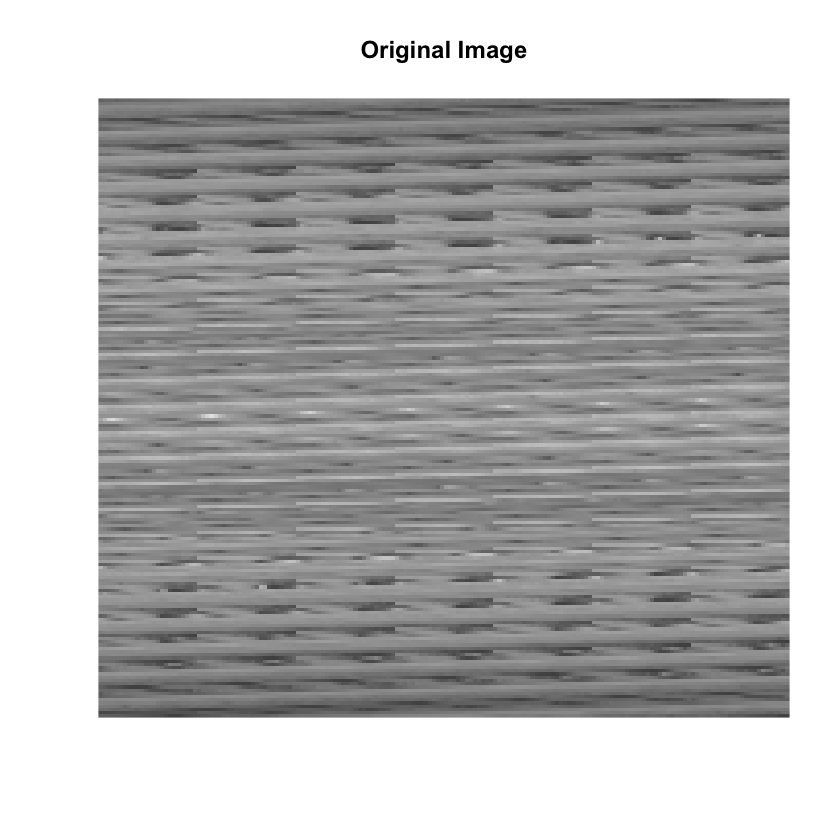

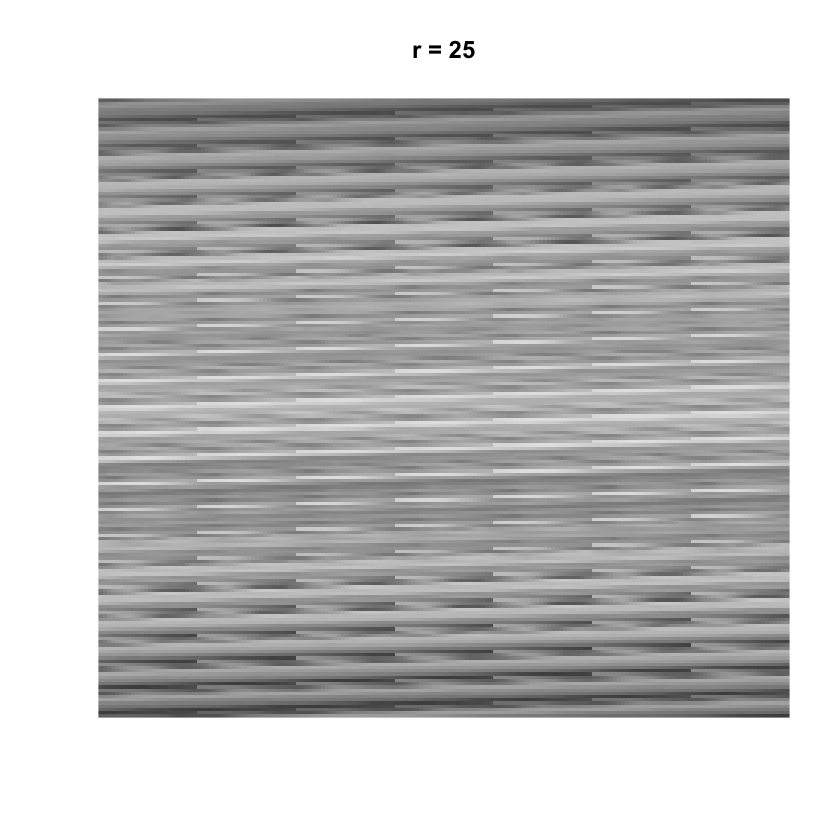

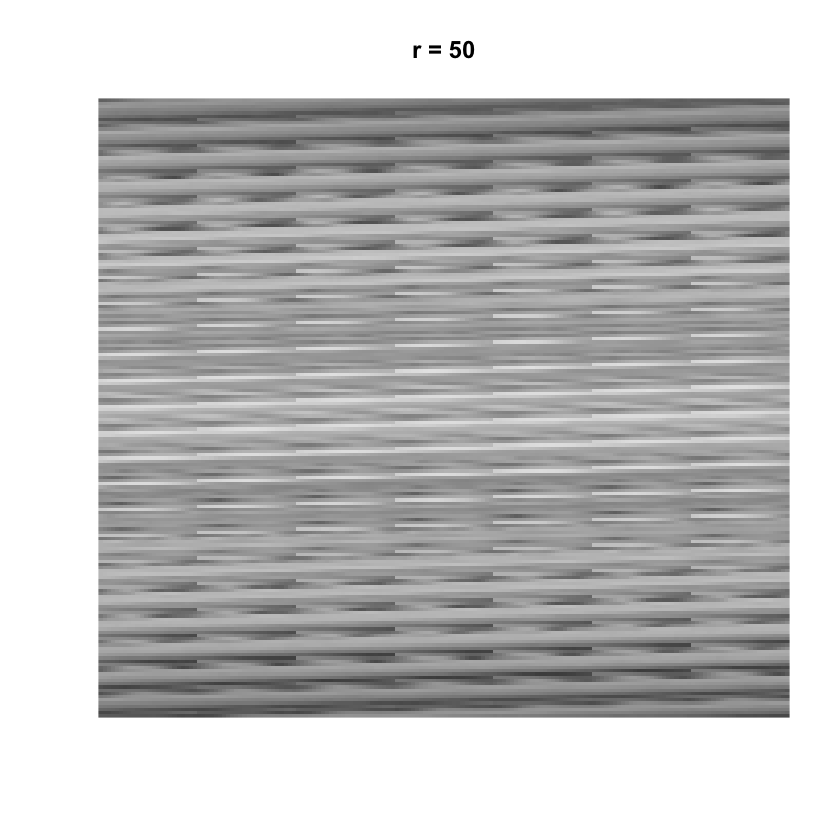

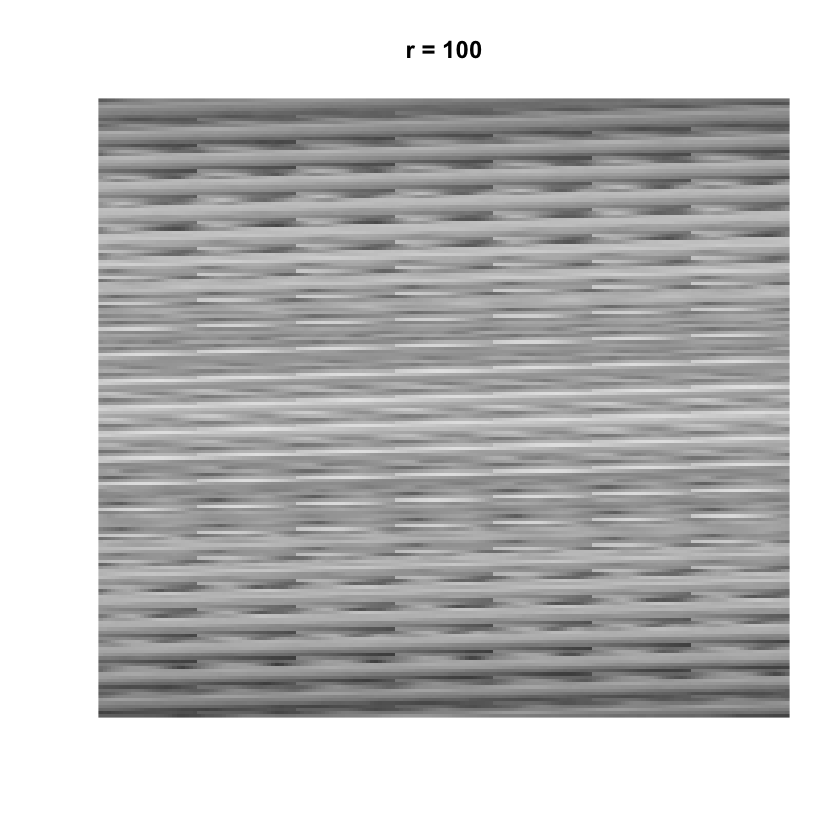

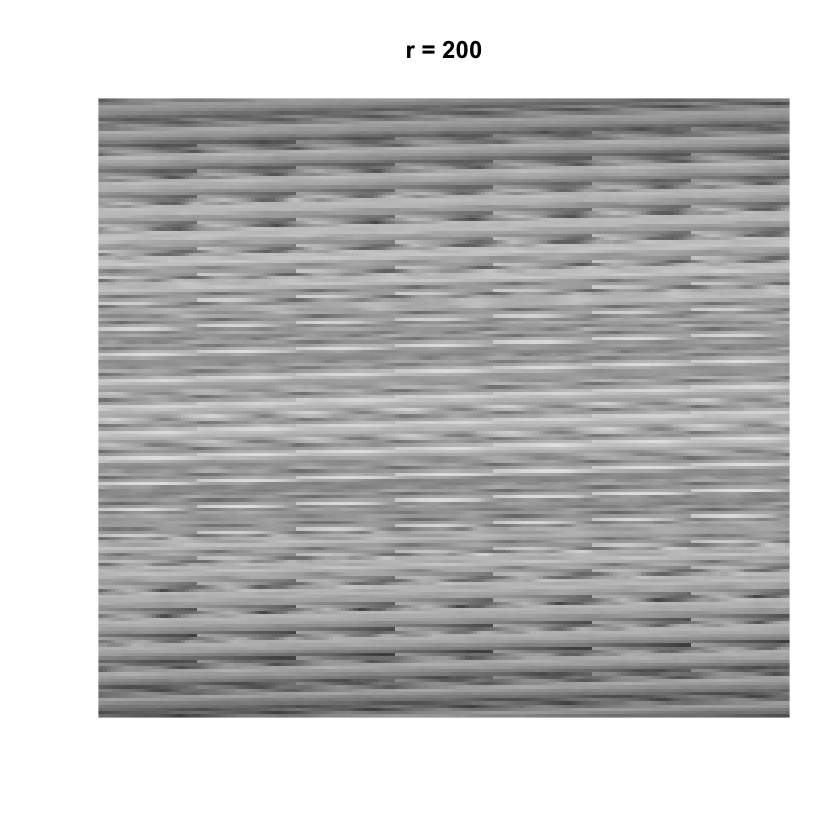

In [3]:
# Show eigenface reconstruction of test image
testFace <- faces[, sum(nfaces[1:36]) + 1]
image(matrix(testFace, m, n), col=gray.colors(256), axes=FALSE)
title("Original Image")

testFaceMS <- testFace - avgFace
r_list <- c(25, 50, 100, 200, 400,)

# 修改第三个代码块中的绘图部分
# 首先显示原始图像
par(mfrow=c(1,1))  # 重置为单图布局
image(matrix(testFace, m, n), col=gray.colors(256), axes=FALSE)
title("Original Image")

# 然后循环显示重建图像
for(r in r_list) {
    par(mfrow=c(1,1))  # 每次显示一张图
    Ur <- U[, 1:r]
    reconFace <- avgFace + Ur %*% t(Ur) %*% testFaceMS
    image(matrix(reconFace, m, n), col=gray.colors(256), axes=FALSE)
    title(paste("r =", r))
}

In [ ]:
# Project person 2 and 7 onto PC5 and PC6
P1num <- 2  # Person number 2
P2num <- 7  # Person number 7

P1_start <- ifelse(P1num == 1, 1, sum(nfaces[1:(P1num-1)]) + 1)
P1_end <- sum(nfaces[1:P1num])
P2_start <- ifelse(P2num == 1, 1, sum(nfaces[1:(P2num-1)]) + 1)
P2_end <- sum(nfaces[1:P2num])

P1 <- faces[, P1_start:P1_end]
P2 <- faces[, P2_start:P2_end]

# Center the data
P1 <- sweep(P1, 1, avgFace)
P2 <- sweep(P2, 1, avgFace)

# Project onto PCA modes 5 and 6
PCAmodes <- c(5, 6)
PCACoordsP1 <- t(U[, PCAmodes]) %*% P1
PCACoordsP2 <- t(U[, PCAmodes]) %*% P2

# Create data frame for plotting
plot_data <- data.frame(
    PC5 = c(PCACoordsP1[1,], PCACoordsP2[1,]),
    PC6 = c(PCACoordsP1[2,], PCACoordsP2[2,]),
    Person = factor(c(rep("Person 2", ncol(P1)), rep("Person 7", ncol(P2))))
)

# 修改最后一个代码块中的散点图部分
# 使用ggplot2创建散点图
ggplot(plot_data, aes(x=PC5, y=PC6, shape=Person, color=Person)) +
    geom_point(size=3) +
    scale_shape_manual(values=c(18, 17)) +  # 使用不同的点形状
    scale_color_manual(values=c("black", "red")) +  # 使用黑色和红色
    theme_minimal() +
    labs(title="Projection onto PC5 and PC6",
         x="PC5",
         y="PC6") +
    theme(plot.title = element_text(hjust = 0.5))  # 居中标题